In [1]:
url = "https://en.wikipedia.org/wiki/India"

Getting Data

In [3]:
import requests
text = requests.get(url).content.decode('utf-8')
print (text[:2000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>India - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if

In [31]:
# HTML Parsing
from html.parser import HTMLParser

class MyHTMLParser (HTMLParser):
  script = False # I don't need to parse script
  res = " "
  def handle_starttag (self,tag,attrs):
    if (tag.lower()) in ["script","style","h2"]:
      self.script=True
  def handle_endtag(self,tag):
    if tag.lower() in ["script","style","h2"]:
      self.script = False
  def handle_data (self,data):
    if str.strip(data)=="" or self.script:
      return
    self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res

print (text[:1000])
#Clean and worthy data


    India - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Etymology 2 History Toggle History subsection 2.1 Ancient India 2.2 Medieval India 2.3 Early modern India 2.4 Modern India 3 Geography 4 Biodiversity 5 Politics and government Toggle Politics and government subsection 5.1 Politics 5.2 Government 5.3 Administrative divisions 5.3.1 States 5.3.2 Union territories 6 Foreign, economic and strategic relations 7 Economy Toggle Economy subsection 7.1 Industries 7.2 Energy 7.3 Socio-economic challenges 8 Demographics, languages and religion 9 Cultu

In [32]:
import sys
!{sys.executable} -m pip install nlp_rake

In [36]:
import nlp_rake
extractor = nlp_rake.Rake (max_words=2,min_freq=5, min_chars =4)
res = extractor.apply(text)
res=res[:100]

#for i in range (0,50)
for item in res:
  if (item[0][0]=='^' or item[0][0]==' ' ):
    res.remove(item)

res

#type(res[i][0][0]=="^")

[('sri lanka', 4.0),
 ('taj mahal', 4.0),
 ('prime minister', 4.0),
 ('registrar general', 4.0),
 ('bbc news', 4.0),
 ('encyclopædia britannica', 4.0),
 ('2nd ed', 3.9565217391304346),
 ('tamil nadu', 3.9230769230769234),
 ('^ kulke', 3.8108747044917255),
 ('national anthem', 3.787878787878788),
 ('mughal empire', 3.761904761904762),
 ('south asia', 3.632709632709633),
 ('world bank', 3.574468085106383),
 ('united states', 3.571428571428571),
 ('indian subcontinent', 3.4476486246672584),
 ('john wiley', 3.333333333333333),
 ('census commissioner', 3.2777777777777777),
 ('official language', 3.24),
 ('modern india', 3.188512035010941),
 ('south india', 3.0763498728487786),
 ('north india', 2.6930574895563955),
 ('south', 1.837837837837838),
 ('asia', 1.794871794871795),
 ('empire', 1.7619047619047619),
 ('economic', 1.75),
 ('languages', 1.7),
 ('region', 1.65),
 ('language', 1.64),
 ('state', 1.619047619047619),
 ('central', 1.6153846153846154),
 ('official', 1.6),
 ('country', 1.58823

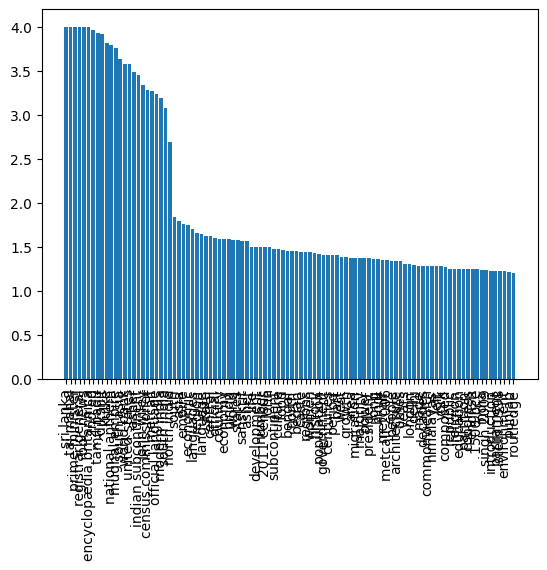

In [19]:
import matplotlib.pyplot as plt
def plot (pair_list):
  k,v = zip(*pair_list)
  plt.bar(range(len(k)),v)
  plt.xticks(range(len(k)),k,rotation='vertical')
  plt.show()

plot(res)

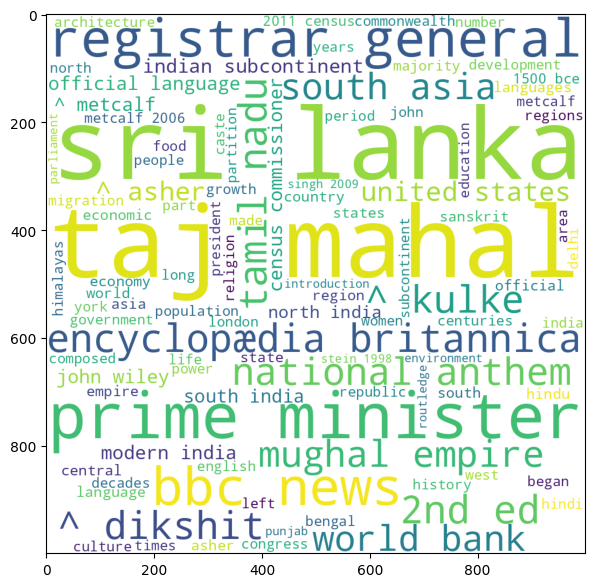

In [20]:
#!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud (background_color='white', width = 1000, height = 1000)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({k:v for k,v in res}))

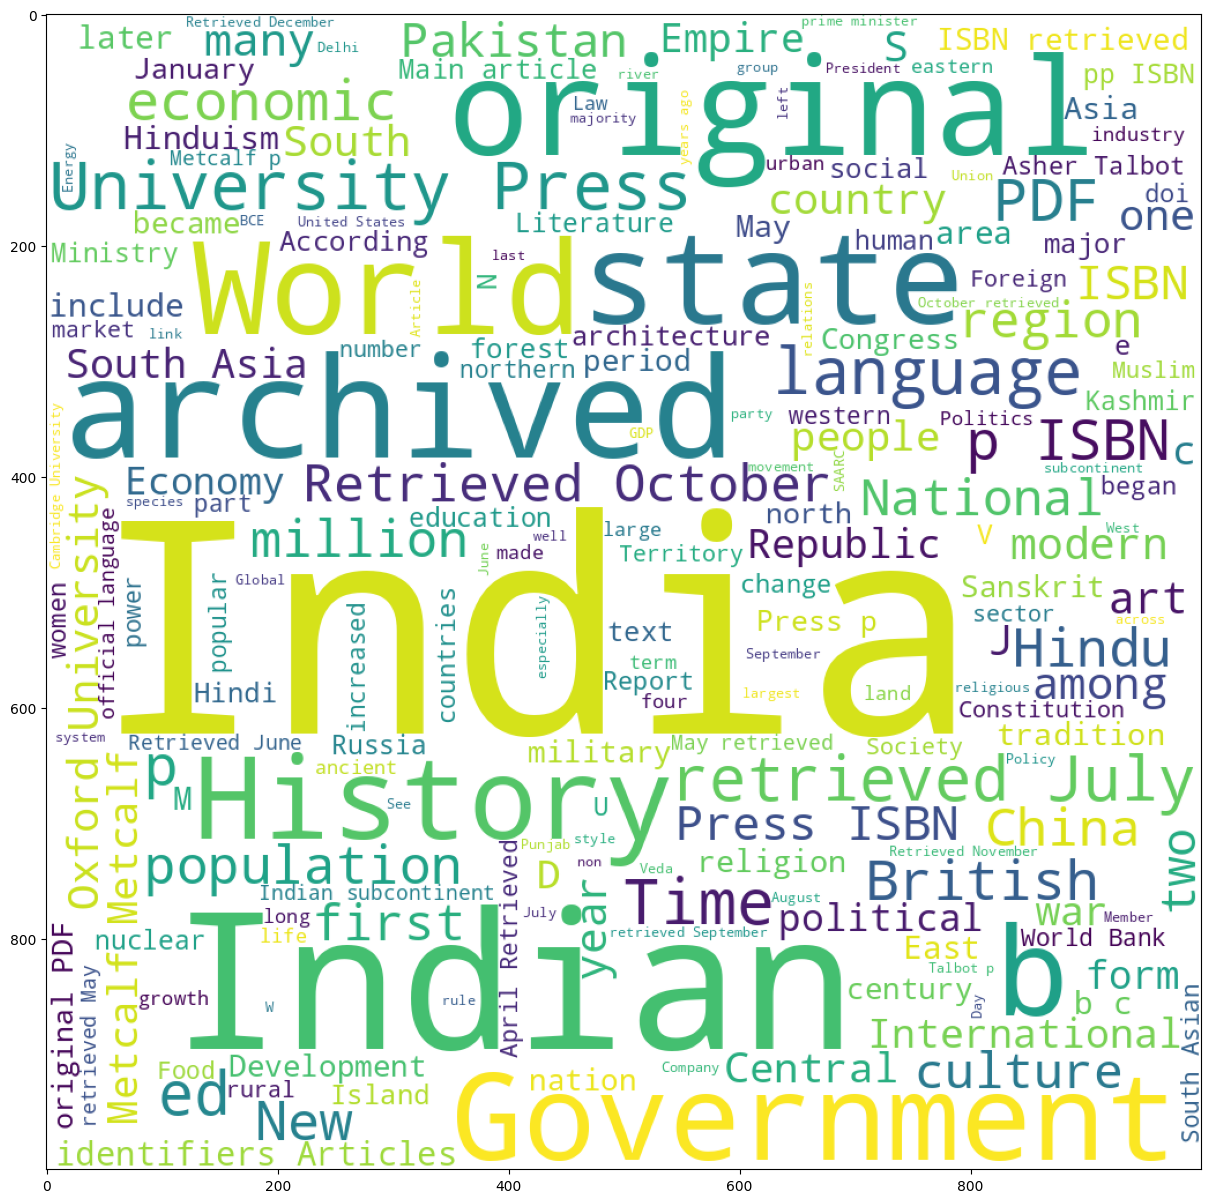

In [40]:
plt.figure(figsize=(15,15))
plt.imshow(wc.generate(text))
#wc.generate(text).to_file('images/ds_wordcloud.png')